In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [8]:
df = pd.read_csv('/content/drive/MyDrive/DEEP LEARNING/Data/Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
df.shape

(500, 9)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [11]:
df.duplicated().value_counts()

,count
False,500


In [12]:
df =  df.drop(columns = ['Serial No.'])

In [13]:
df.shape


(500, 8)

In [14]:
X =  df.drop(columns = ['Chance of Admit '])
y = df['Chance of Admit ']

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

In [16]:
X_train.shape

(400, 7)

In [17]:
scaler =  MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
X_train

array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]])

In [19]:
model = Sequential()
model.add(Dense(7,activation = 'relu',input_dim = 7))
model.add(Dense(7,activation = 'relu'))
model.add(Dense(1,activation = 'linear'))

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer = 'Adam',loss = 'mean_squared_error',metrics = ['mean_absolute_error'])

In [22]:
history =  model.fit(X_train,y_train,epochs = 100,validation_split = 0.2)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.3703 - mean_absolute_error: 1.1201 - val_loss: 1.3378 - val_mean_absolute_error: 1.1243
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2083 - mean_absolute_error: 1.0544 - val_loss: 1.1235 - val_mean_absolute_error: 1.0308
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0097 - mean_absolute_error: 0.9648 - val_loss: 0.9417 - val_mean_absolute_error: 0.9440
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8065 - mean_absolute_error: 0.8616 - val_loss: 0.7869 - val_mean_absolute_error: 0.8629
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7065 - mean_absolute_error: 0.8060 - val_loss: 0.6489 - val_mean_absolute_error: 0.7837
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5480 - mean_absolute_error: 0.7064 - val_loss: 0.5266 - val_mean_absolute_error: 0.7059
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4596 - mean_absolute_error: 0.6470 - val_los

In [23]:
y_pred =  model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [24]:
r2_score(y_test,y_pred)

0.7918973395509307

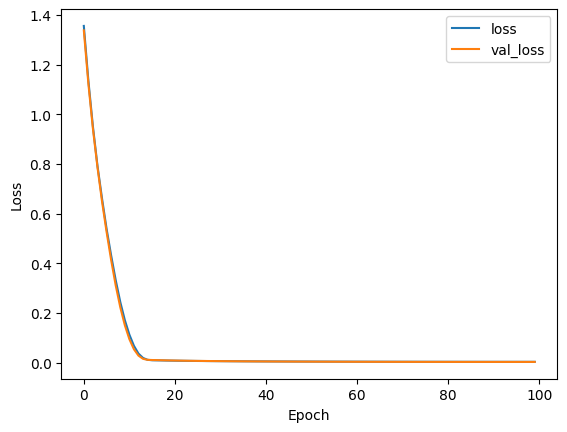

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['loss' , 'val_loss'])

<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

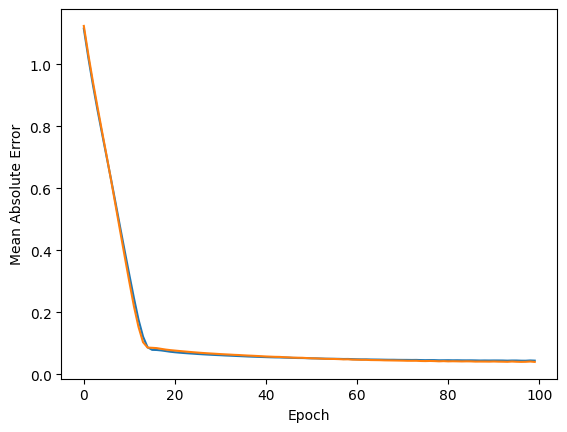

In [26]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend

# LOAD MODEL AND TEST ON CUSTOM DATA

In [27]:
model.save('admission_pred_model.h5')

In [28]:
from tensorflow.keras.models import load_model

loaded_model = load_model('/content/admission_pred_model.h5')


In [29]:
custom_input = {
    'GRE Score': 320,
    'TOEFL Score': 110,
    'University Rating': 4,
    'SOP': 4.5,
    'LOR': 4.0,
    'CGPA': 8.5,
    'Research': 1
}

# Convert to DataFrame
custom_input_df = pd.DataFrame([custom_input])

custom_input_df = pd.DataFrame([custom_input])
custom_input_df.head()



,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,320,110,4,4.5,4.0,8.5,1


In [30]:
original_columns = ['GRE Score', 'TOEFL Score' , 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']


# Add any missing columns to custom_input_df
missing_cols = set(original_columns) - set(custom_input_df.columns)
print(missing_cols)
for col in missing_cols:
    custom_input_df[col] = 0

# Reorder the columns to match the original feature order
custom_input_df = custom_input_df[original_columns]
custom_input_df.head()

set()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,320,110,4,4.5,4.0,8.5,1


In [33]:
custom_input_df = custom_input_df.reindex(columns=scaler.feature_names_in_, fill_value=0)
custom_input_scaled = scaler.transform(custom_input_df)

In [34]:



prediction = loaded_model.predict(custom_input_scaled)

print(f'Predicted value: {prediction[0][0]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted value: 0.7559141516685486
